In [1]:
# import ipywidgets.interact class, this class will represent a slide bar.
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '../../')
from sub_projects.ray_optimization.losses import RayLoss, SinkhornLoss, RayCountMSE, ScheduledLoss, HistogramMSE, \
    CovMSE, KLDLoss, MSELoss, JSLoss, SSIMHistogramLoss, BoxIoULoss
from loss_exploration import evaluate_single_var

[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


In [2]:
%matplotlib inline
@interact(y=(-0.1, 0.1, 0.001))
def square_number(y):
    # print("The square of %d is %d." % (y, y**2))
    # plt.plot(np.arange(y))
    out = evaluate_single_var('x_var', y, MSELoss())
    print(out)

interactive(children=(FloatSlider(value=0.0, description='y', max=0.1, min=-0.1, step=0.001), Output()), _dom_…

# Correlation

In [ ]:
%matplotlib inline

@interact(correlation=(-1,1, 0.1),x_var=(0.1,1.0, 0.1),y_var=(0.1,1.0, 0.1))
def plot_sth(correlation , x_var, y_var):
    x_var = torch.tensor(x_var)
    y_var = torch.tensor(y_var)
    x_mean = 0
    y_mean = 2
    correlation_factor = correlation
    correlation = correlation_factor*torch.sqrt(x_var)*torch.sqrt(y_var)
    m = torch.distributions.multivariate_normal.MultivariateNormal(torch.Tensor([x_mean, y_mean]),
                                                                           torch.Tensor([[x_var,correlation],[correlation, y_var]]))

    s = m.sample(torch.Size([4000]))
    plt.scatter(s[:,0], s[:,1])
    plt.xlim([-5, 5])
    plt.ylim([-5, 5])
    plt.plot()

In [ ]:
import torch
target = torch.Tensor([0.10, 0.15, 0.05])
input = torch.Tensor([3.10, 3.15, 3.05]).log()
torch.mean(target * (target.log() - input))

In [ ]:
torch.nn.KLDivLoss(log_target=False)(input, target)

In [53]:
import sys
import torch
sys.path.insert(0, '../../')
from sub_projects.ray_optimization.real_data import import_data
from ray_optim.ray_optimizer import RayOptimizer
from sub_projects.ray_optimization.utils import ray_output_to_tensor
from sub_projects.ray_optimization.config.config_tpe import PARAM_FUNC

In [54]:
real_data_dir = '../../datasets/metrix_real_data/2021_march_complete'
imported_measurements = ['M03', 'M10']
output = import_data(real_data_dir, imported_measurements, [0, 5, 10, 15], PARAM_FUNC())

43it [00:00, 146.32it/s]


In [79]:
output_tensor = ray_output_to_tensor(output, "ImagePlane")
op = [list(element.split(1)) for element in output_tensor]
#print([el.shape for el in op])

AttributeError: 'list' object has no attribute 'shape'

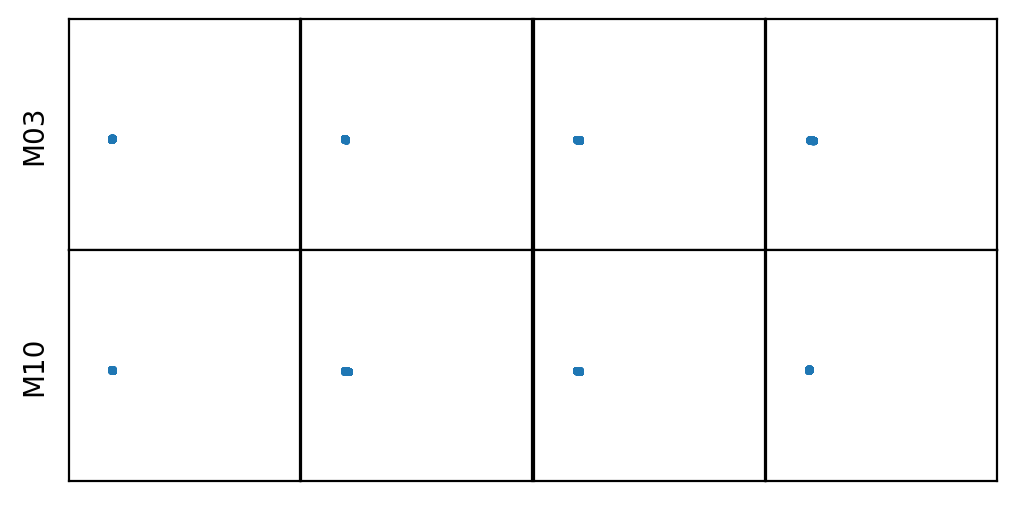

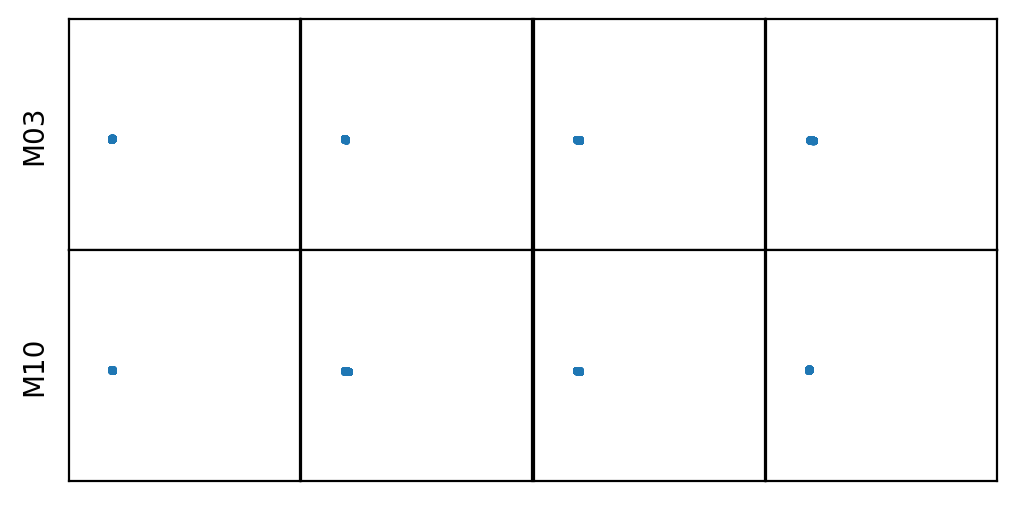

In [82]:
%matplotlib inline
RayOptimizer.fixed_position_plot_base(op, [-2,2], [-2,2], imported_measurements)

In [73]:
a = torch.rand((3,3))
print(a.shape)

torch.Size([3, 3])


In [76]:
list(a.split(1))

[tensor([[0.1733, 0.3523, 0.3974]]),
 tensor([[0.9180, 0.3547, 0.7158]]),
 tensor([[0.2720, 0.2610, 0.1203]])]

In [6]:
1.e-10

1e-10